# Analysis
In this notebook we will talk about our findings from this project, include various animations of both 2d and 3d birds flocking and plots of how the Vicsek Order Parameter and convergence of this overdamped system is affected by varying the parameters. 

In [2]:
from flock import *

## 2D Birds
We generated 200 birds distributed uniformly in $\mathbb{R}^2$ with thetas distributed unifomly $0$ to $2\pi$. Their positions were updated according to the Vicsek Model.

In [20]:
##Generate a flock of 200 birds, speed 0.5, frame size 15 radii
f = Flock(200,0.5,15)
##Create an animated quiver plot of birds moving for different sigma
## TODO sort out reset 
# anim_02 =f.animate_movement_quiver(1,40,200,0.2)
# f.reset()
# anim_04 =f.animate_movement_quiver(1,40,200,0.4)
# f.reset()
# anim_06 =f.animate_movement_quiver(1,40,200,0.6)
# f.reset()
# anim_08 =f.animate_movement_quiver(1,40,200,0.8)
# f.reset()

In [3]:
HTML(anim_02.to_jshtml())

NameError: name 'anim_02' is not defined

In [ ]:
HTML(anim_04.to_jshtml())

In [ ]:
HTML(anim_06.to_jshtml())

In [ ]:
HTML(anim_08.to_jshtml())

## Vicsek Order Paramater 
Below we plot the Vicsek Order Parameter and consider the implications for the model in terms of phase transitions yada yada

In [6]:
#creates a flock of 200 birds, speed 0.5 in a box 15 times their radius view
def plot_order_stat(sigma,B=10,T=200):
    f = Flock(200,0.5,15)
    ts = np.zeros((B,T))
    vops =np.zeros((B,T))
    for i in range(B):
        ts[i],vops[i] = f.plot_order_stat(1,T,sigma,display=False,plot=False)
        f.reset()
    fig,ax = plt.subplots()
    ax.plot(ts[0],vops.transpose())

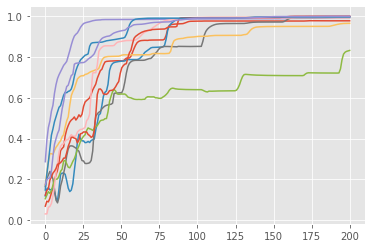

In [7]:
##TODO lay these out nicely, (think rc params helps check it out). add xlabels,ylabels,titles, maybe legend (but probs not necessary)
##TODO plots with error bars 
##TODO analysis of plots +phase transition stuff
##TODO if we could layout 5 plots with 5 animations side by side that would be epic


plot_order_stat(0)
# plot_order_stat(0.2)
# plot_order_stat(0.4)
# plot_order_stat(0.6)
# plot_order_stat(0.8)

## n Phase Transition Plot

In [75]:
# nrun = 20
# nsig = 20
# data = np.zeros((nrun,nsig))
# for i in range(nrun):
#     print(f'completed run {i}')
#     for j in range(nsig):
#         f.reset()
#         ts,vops=f.plot_order_stat(1,1000,j*0.1,display=False,plot=False)
#         data[i,j] = np.mean(vops[200:])
# print(data)        


completed run 0
completed run 1
completed run 2
completed run 3
completed run 4
completed run 5
completed run 6
completed run 7
completed run 8
completed run 9
completed run 10
completed run 11
completed run 12
completed run 13
completed run 14
completed run 15
completed run 16
completed run 17
completed run 18
completed run 19
[[1.         0.9891701  0.95887121 0.90539334 0.85142678 0.76719577
  0.69775753 0.54206346 0.44032417 0.35951083 0.25213437 0.17065366
  0.13400558 0.09887476 0.0885024  0.07885746 0.0730075  0.06814452
  0.06631953 0.06560915]
 [0.9998591  0.9885268  0.95569287 0.8977974  0.8557386  0.77705122
  0.68072249 0.57667748 0.46830136 0.35334168 0.23665734 0.19084844
  0.12351511 0.09523712 0.0792841  0.07550155 0.07395592 0.06864783
  0.06864025 0.06735517]
 [0.99671849 0.98281406 0.96081034 0.91009651 0.8591585  0.78770575
  0.67555939 0.57366381 0.46745914 0.36848084 0.23893648 0.16068237
  0.11645727 0.10213364 0.08080506 0.07812414 0.07270494 0.06935811
  0.0673

In [7]:
colname = np.array(np.round(np.linspace(0,1.9,20), decimals = 1),dtype= str)
print(colname)
# df = pd.DataFrame(data, columns = colname)
# f = open('data.csv',"w+")
# f.write(df.to_csv(index = True))
# f.close()




['0.0' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7' '0.8' '0.9' '1.0' '1.1'
 '1.2' '1.3' '1.4' '1.5' '1.6' '1.7' '1.8' '1.9']


[0.00246616 0.00291914 0.00406948 0.0067401  0.0084746  0.0095689
 0.01085015 0.02182583 0.02164377 0.02220811 0.01489427 0.0118653
 0.00603802 0.0031105  0.00286915 0.00229249 0.00143008 0.00131978
 0.00169334 0.00090945]


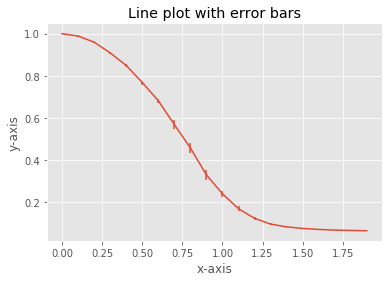

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/bennm37/vicsek-model-group3/animate_vicsek_birds/data.csv')
df
datmean = np.array(df.mean())
datst = np.array(df.std())
print(datst)
x = np.linspace(0,1.9,20)
y = datmean
yerr = datst

fig, ax = plt.subplots()

ax.errorbar(x, y,
            xerr=0,
            yerr=yerr)


ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Line plot with error bars')

plt.show()




## 3D Birds 
By adapting the Flock class we have created 3d birds. To initate their directions we considered projecting uniformly random points on a cylinder onto a sphere to get an even distribution of points unbiased about the poles. Positions were uniformly random in $\mathbb{R}^3$. To update directions we used noise normally distributed in phi and theta and then scaled accordingly to be unbiased to the poles. Here 6 radii are used instead of 15, as a paper(cite) suggested an important parameter was the ratio of the number of birds to the volume of the frame in radii. 

In [ ]:

# f_3d = Flock_3d(200,0.5,6)
# anim = f_3d.animate_movement(1,200)
HTML(anim.to_jshtml())